# Helper Functions for visualization Trees in jupyter Notebook

we can use graphviz to draw Trees easily. you don't have to understand them but if you want use visualize below, you will have to set it up on your machine.
Instructions for installation of the underlying tool graphviz can be seen here:

Ubuntu: sudo apt install graphviz

Mac:    brew install graphviz

windows: https://graphviz.org/download/ (you will need to set path manually. See instructions here: )
         https://bobswift.atlassian.net/wiki/spaces/GVIZ/pages/20971549/How+to+install+Graphviz+software

Then install the python package for communicating with graphviz.

In [2]:
!pip install graphviz

The following function essentially just traverses the whole tree and adds nodes and edges to the graph. Then we use graphviz to visualize it.

In [3]:
from graphviz import Digraph

def visualize_tree(tree):
    if tree is None: return 'Nothing in the tree !'
    def add_nodes_edges(tree, dot=None):
        #create Digraph object
        if dot is None:
            dot = Digraph()
            dot.attr('node', shape='circle')
            dot.node(name = str(tree), label=str(tree.val))
            
        for child in [tree.left, tree.right]: # do for all children
            if child is not None:
                if child == tree.left: dot.attr('node', shape='circle', style='filled', fillcolor='lightblue')
                if child == tree.right: dot.attr('node', shape='doublecircle', style='filled', fillcolor='seashell')
                dot.node(name=str(child), label=str(child.val))
                dot.edge(str(tree), str(child))
                dot = add_nodes_edges(child, dot=dot) # recursive call
                    
        return dot
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)
        
    # visualize the graph
    display(dot)

In [4]:
def print_tree(tree, level=0, label='.'):
    print(' ' * (level*2)+ label + ':', tree.val)
    for child, lbl in zip([tree.left, tree.right], ['L', 'R']): # do for all children
        if child is not None:
            print_tree(child, level+1, lbl)

# Trees

A Tree is conceptually very similar to a linked list !

In [6]:
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

# Creating a Tree from an Individual Node

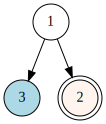

In [8]:
# left tree
t1 = TreeNode(1)

t1.left = TreeNode(3)
t1.right = TreeNode(2)
visualize_tree(t1) # this function needs a bit of extra (optional) code and setup
#print_tree(t1) # you can use this function easily

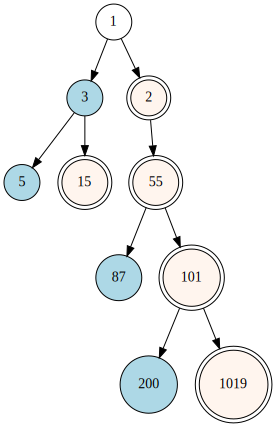

In [9]:
t1.left.left = TreeNode(5)
t1.left.right = TreeNode(15)

t1.right.right = TreeNode(55)
t1.right.right.left = TreeNode(87)
t1.right.right.right = TreeNode(101)
t1.right.right.right.right = TreeNode(1019)
t1.right.right.right.left = TreeNode(200)

visualize_tree(t1)
#print_tree(t1)

# Tree Traversal - Depth First Search

In [10]:
# print all nodes on the tree
def dfs(self):
    print(self.val)
    
    if self.left:
        self.left.dfs()
    if self.right:
        self.right.dfs()

TreeNode.dfs = dfs

In [11]:
t1.dfs()

1
3
5
15
2
55
87
101
200
1019


In [12]:
def dfs_inorder(self):
    if self.left:
        self.left.dfs_inorder()
    
    print(self.val)
    
    if self.right:
        self.right.dfs_inorder()

TreeNode.dfs_inorder = dfs_inorder

In [13]:
t1.dfs_inorder()

5
3
15
1
2
87
55
200
101
1019


In [13]:
def dfs_postorder(self):
    if self.left:
        self.left.dfs_postorder()
    
    if self.right:
        self.right.dfs_postorder()
        
    print(self.val)
    
TreeNode.dfs_postorder = dfs_postorder

In [14]:
t1.dfs_postorder()

5
15
3
87
200
1019
101
55
2
1


# Tree Traversal - Breadth First Search

In [14]:
print_tree(t1)

.: 1
  L: 3
    L: 5
    R: 15
  R: 2
    R: 55
      L: 87
      R: 101
        L: 200
        R: 1019


In [15]:
def bfs(self):
    to_visit = [ self ]
    
    while to_visit:
        current = to_visit.pop(0) # get the first one but out...so, queue
        
        print(current.val)
        
        if current.left:
            to_visit.append(current.left)
        if current.right:
            to_visit.append(current.right)
    
TreeNode.bfs = bfs

In [16]:
t1.bfs()

1
3
2
5
15
55
87
101
200
1019


# Perform Arbitrary Tasks on All Nodes

In [17]:
print_tree(t1)

.: 1
  L: 3
    L: 5
    R: 15
  R: 2
    R: 55
      L: 87
      R: 101
        L: 200
        R: 1019


In [18]:
def dfs_apply(self, fn):
    fn(self)
    
    if self.left:
        self.left.dfs_apply(fn)
        
    if self.right:
        self.right.dfs_apply(fn)
    
TreeNode.dfs_apply = dfs_apply

In [19]:
class PerformSum:
    def __init__(self):
        self.sum = 0
        
    def process(self, node):
        self.sum += node.val
        
    def get_sum(self):
        return self.sum

    def reset_sum(self):
        self.sum = 0

In [20]:
p = PerformSum()

In [21]:
p.reset_sum()
t1.dfs_apply(p.process)
print(p.get_sum())

1488
